In [19]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

Stock name: MU
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


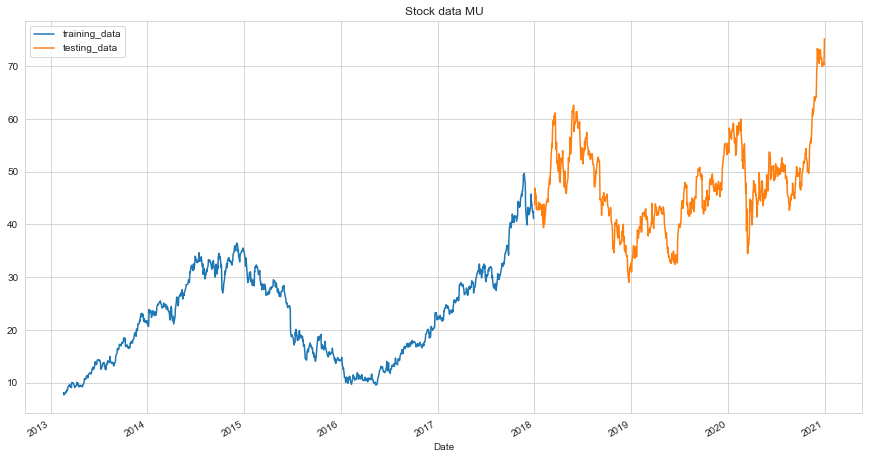

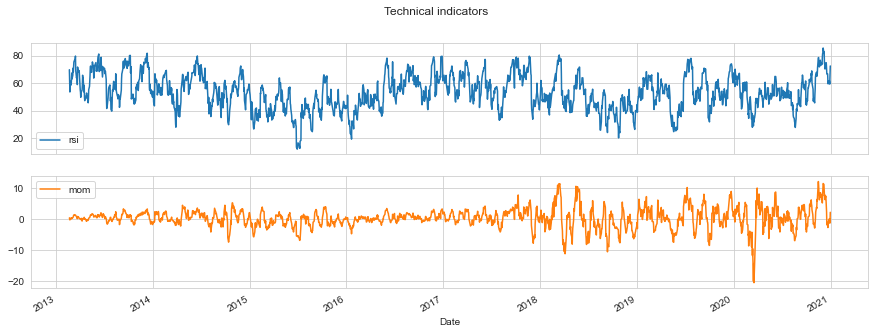

In [20]:
stock_name = 'mu'.upper()
industry = 'Technology'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [21]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1947.98, duration: 0:00:00.205637
episode: 2/2000, episode end value: 1577.84, duration: 0:00:00.175049
episode: 3/2000, episode end value: 2057.75, duration: 0:00:00.176047
episode: 4/2000, episode end value: 2223.17, duration: 0:00:00.167530
episode: 5/2000, episode end value: 1926.50, duration: 0:00:00.185331
episode: 6/2000, episode end value: 1940.48, duration: 0:00:00.208067
episode: 7/2000, episode end value: 2416.29, duration: 0:00:00.168827
episode: 8/2000, episode end value: 1992.02, duration: 0:00:00.188264
episode: 9/2000, episode end value: 2143.12, duration: 0:00:00.183057
episode: 10/2000, episode end value: 1908.44, duration: 0:00:00.187324
episode: 11/2000, episode end value: 1898.80, duration: 0:00:00.226586
episode: 12/2000, episode end value: 1885.66, duration: 0:00:00.218251
episode: 13/2000, episode end value: 2117.55, duration: 0:00:00.221882
episode: 14/2000, episode end value: 1938.07, duration: 0:00:00.193558
episode: 15/200

episode: 117/2000, episode end value: 1882.64, duration: 0:00:00.268779
episode: 118/2000, episode end value: 1868.57, duration: 0:00:00.295116
episode: 119/2000, episode end value: 1880.18, duration: 0:00:00.257605
episode: 120/2000, episode end value: 1943.21, duration: 0:00:00.253355
episode: 121/2000, episode end value: 1895.68, duration: 0:00:00.236140
episode: 122/2000, episode end value: 1926.31, duration: 0:00:00.240950
episode: 123/2000, episode end value: 1879.80, duration: 0:00:00.261396
episode: 124/2000, episode end value: 1866.03, duration: 0:00:00.264629
episode: 125/2000, episode end value: 2065.92, duration: 0:00:00.217851
episode: 126/2000, episode end value: 2023.06, duration: 0:00:00.233355
episode: 127/2000, episode end value: 2007.49, duration: 0:00:00.249517
episode: 128/2000, episode end value: 1996.51, duration: 0:00:00.207721
episode: 129/2000, episode end value: 2043.67, duration: 0:00:00.246824
episode: 130/2000, episode end value: 1913.12, duration: 0:00:00

episode: 231/2000, episode end value: 1953.43, duration: 0:00:00.260057
episode: 232/2000, episode end value: 2041.07, duration: 0:00:00.257433
episode: 233/2000, episode end value: 1884.89, duration: 0:00:00.251440
episode: 234/2000, episode end value: 1853.98, duration: 0:00:00.287309
episode: 235/2000, episode end value: 1786.26, duration: 0:00:00.225419
episode: 236/2000, episode end value: 1833.83, duration: 0:00:00.251846
episode: 237/2000, episode end value: 1876.83, duration: 0:00:00.248070
episode: 238/2000, episode end value: 1786.49, duration: 0:00:00.264173
episode: 239/2000, episode end value: 1782.28, duration: 0:00:00.229580
episode: 240/2000, episode end value: 1876.40, duration: 0:00:00.273358
episode: 241/2000, episode end value: 1941.23, duration: 0:00:00.249479
episode: 242/2000, episode end value: 1924.40, duration: 0:00:00.256759
episode: 243/2000, episode end value: 1888.82, duration: 0:00:00.231683
episode: 244/2000, episode end value: 2016.44, duration: 0:00:00

episode: 345/2000, episode end value: 1877.12, duration: 0:00:00.260059
episode: 346/2000, episode end value: 1893.37, duration: 0:00:00.277064
episode: 347/2000, episode end value: 1891.47, duration: 0:00:00.240690
episode: 348/2000, episode end value: 1937.67, duration: 0:00:00.230730
episode: 349/2000, episode end value: 1929.09, duration: 0:00:00.270061
episode: 350/2000, episode end value: 1971.84, duration: 0:00:00.259063
episode: 351/2000, episode end value: 1926.15, duration: 0:00:00.261059
episode: 352/2000, episode end value: 1902.38, duration: 0:00:00.289943
episode: 353/2000, episode end value: 1900.65, duration: 0:00:00.261066
episode: 354/2000, episode end value: 1964.34, duration: 0:00:00.257304
episode: 355/2000, episode end value: 1899.26, duration: 0:00:00.263061
episode: 356/2000, episode end value: 1890.27, duration: 0:00:00.264888
episode: 357/2000, episode end value: 1941.79, duration: 0:00:00.285106
episode: 358/2000, episode end value: 1957.73, duration: 0:00:00

episode: 459/2000, episode end value: 1858.86, duration: 0:00:00.300799
episode: 460/2000, episode end value: 1857.73, duration: 0:00:00.296680
episode: 461/2000, episode end value: 1813.71, duration: 0:00:00.281055
episode: 462/2000, episode end value: 1856.55, duration: 0:00:00.289882
episode: 463/2000, episode end value: 1857.89, duration: 0:00:00.293839
episode: 464/2000, episode end value: 1799.47, duration: 0:00:00.294326
episode: 465/2000, episode end value: 1852.22, duration: 0:00:00.283157
episode: 466/2000, episode end value: 1780.79, duration: 0:00:00.301063
episode: 467/2000, episode end value: 1856.50, duration: 0:00:00.287068
episode: 468/2000, episode end value: 1858.90, duration: 0:00:00.279223
episode: 469/2000, episode end value: 1874.35, duration: 0:00:00.264481
episode: 470/2000, episode end value: 2018.76, duration: 0:00:00.207048
episode: 471/2000, episode end value: 1862.50, duration: 0:00:00.245094
episode: 472/2000, episode end value: 1875.99, duration: 0:00:00

episode: 573/2000, episode end value: 1858.43, duration: 0:00:00.309955
episode: 574/2000, episode end value: 1858.96, duration: 0:00:00.286449
episode: 575/2000, episode end value: 1809.07, duration: 0:00:00.284504
episode: 576/2000, episode end value: 1859.25, duration: 0:00:00.280629
episode: 577/2000, episode end value: 1833.47, duration: 0:00:00.288474
episode: 578/2000, episode end value: 1832.22, duration: 0:00:00.267879
episode: 579/2000, episode end value: 1809.54, duration: 0:00:00.318864
episode: 580/2000, episode end value: 1859.08, duration: 0:00:00.319373
episode: 581/2000, episode end value: 1791.75, duration: 0:00:00.296087
episode: 582/2000, episode end value: 1858.29, duration: 0:00:00.271289
episode: 583/2000, episode end value: 1858.62, duration: 0:00:00.287693
episode: 584/2000, episode end value: 1784.87, duration: 0:00:00.256525
episode: 585/2000, episode end value: 2001.77, duration: 0:00:00.246313
episode: 586/2000, episode end value: 2110.56, duration: 0:00:00

episode: 687/2000, episode end value: 1788.90, duration: 0:00:00.276799
episode: 688/2000, episode end value: 1858.68, duration: 0:00:00.270111
episode: 689/2000, episode end value: 1787.50, duration: 0:00:00.275380
episode: 690/2000, episode end value: 1785.92, duration: 0:00:00.274746
episode: 691/2000, episode end value: 1843.98, duration: 0:00:00.273361
episode: 692/2000, episode end value: 1860.96, duration: 0:00:00.285638
episode: 693/2000, episode end value: 1857.31, duration: 0:00:00.281564
episode: 694/2000, episode end value: 2164.74, duration: 0:00:00.192897
episode: 695/2000, episode end value: 1955.12, duration: 0:00:00.226902
episode: 696/2000, episode end value: 1911.11, duration: 0:00:00.234944
episode: 697/2000, episode end value: 1912.99, duration: 0:00:00.194470
episode: 698/2000, episode end value: 1712.90, duration: 0:00:00.215796
episode: 699/2000, episode end value: 1768.64, duration: 0:00:00.278877
episode: 700/2000, episode end value: 1827.24, duration: 0:00:00

episode: 801/2000, episode end value: 1935.78, duration: 0:00:00.243176
episode: 802/2000, episode end value: 1870.44, duration: 0:00:00.255691
episode: 803/2000, episode end value: 1931.24, duration: 0:00:00.249517
episode: 804/2000, episode end value: 1914.71, duration: 0:00:00.218377
episode: 805/2000, episode end value: 2215.18, duration: 0:00:00.207298
episode: 806/2000, episode end value: 2071.64, duration: 0:00:00.243357
episode: 807/2000, episode end value: 1915.37, duration: 0:00:00.223478
episode: 808/2000, episode end value: 1930.17, duration: 0:00:00.273814
episode: 809/2000, episode end value: 1972.10, duration: 0:00:00.227784
episode: 810/2000, episode end value: 1901.76, duration: 0:00:00.227744
episode: 811/2000, episode end value: 2009.37, duration: 0:00:00.233787
episode: 812/2000, episode end value: 1928.16, duration: 0:00:00.250075
episode: 813/2000, episode end value: 1937.09, duration: 0:00:00.247424
episode: 814/2000, episode end value: 1962.89, duration: 0:00:00

episode: 915/2000, episode end value: 1860.86, duration: 0:00:00.272060
episode: 916/2000, episode end value: 1783.33, duration: 0:00:00.258059
episode: 917/2000, episode end value: 1833.07, duration: 0:00:00.252060
episode: 918/2000, episode end value: 1878.90, duration: 0:00:00.252053
episode: 919/2000, episode end value: 2095.69, duration: 0:00:00.229051
episode: 920/2000, episode end value: 2073.17, duration: 0:00:00.213049
episode: 921/2000, episode end value: 1879.58, duration: 0:00:00.248057
episode: 922/2000, episode end value: 1858.77, duration: 0:00:00.283077
episode: 923/2000, episode end value: 1858.72, duration: 0:00:00.274067
episode: 924/2000, episode end value: 1827.81, duration: 0:00:00.264821
episode: 925/2000, episode end value: 1847.57, duration: 0:00:00.255814
episode: 926/2000, episode end value: 1857.78, duration: 0:00:00.288360
episode: 927/2000, episode end value: 1879.33, duration: 0:00:00.214543
episode: 928/2000, episode end value: 1861.04, duration: 0:00:00

episode: 1029/2000, episode end value: 2053.49, duration: 0:00:00.240434
episode: 1030/2000, episode end value: 1970.56, duration: 0:00:00.265075
episode: 1031/2000, episode end value: 1792.47, duration: 0:00:00.231076
episode: 1032/2000, episode end value: 1744.17, duration: 0:00:00.262535
episode: 1033/2000, episode end value: 1858.30, duration: 0:00:00.294026
episode: 1034/2000, episode end value: 1857.95, duration: 0:00:00.277750
episode: 1035/2000, episode end value: 1857.47, duration: 0:00:00.278413
episode: 1036/2000, episode end value: 1809.36, duration: 0:00:00.278591
episode: 1037/2000, episode end value: 2001.09, duration: 0:00:00.229335
episode: 1038/2000, episode end value: 1807.22, duration: 0:00:00.239838
episode: 1039/2000, episode end value: 1706.42, duration: 0:00:00.279929
episode: 1040/2000, episode end value: 1858.40, duration: 0:00:00.275794
episode: 1041/2000, episode end value: 1798.15, duration: 0:00:00.288055
episode: 1042/2000, episode end value: 1858.55, dur

episode: 1142/2000, episode end value: 2043.31, duration: 0:00:00.284061
episode: 1143/2000, episode end value: 2005.46, duration: 0:00:00.229070
episode: 1144/2000, episode end value: 1886.33, duration: 0:00:00.250056
episode: 1145/2000, episode end value: 1895.15, duration: 0:00:00.238037
episode: 1146/2000, episode end value: 2059.65, duration: 0:00:00.195057
episode: 1147/2000, episode end value: 1947.28, duration: 0:00:00.244056
episode: 1148/2000, episode end value: 2090.55, duration: 0:00:00.189054
episode: 1149/2000, episode end value: 2207.05, duration: 0:00:00.224057
episode: 1150/2000, episode end value: 1941.33, duration: 0:00:00.268064
episode: 1151/2000, episode end value: 1907.91, duration: 0:00:00.252042
episode: 1152/2000, episode end value: 1804.21, duration: 0:00:00.245070
episode: 1153/2000, episode end value: 1858.89, duration: 0:00:00.287049
episode: 1154/2000, episode end value: 1858.67, duration: 0:00:00.279063
episode: 1155/2000, episode end value: 1858.54, dur

episode: 1256/2000, episode end value: 1947.79, duration: 0:00:00.246055
episode: 1257/2000, episode end value: 1929.10, duration: 0:00:00.244067
episode: 1258/2000, episode end value: 1928.26, duration: 0:00:00.258059
episode: 1259/2000, episode end value: 1892.63, duration: 0:00:00.272070
episode: 1260/2000, episode end value: 1936.73, duration: 0:00:00.249036
episode: 1261/2000, episode end value: 2036.78, duration: 0:00:00.188047
episode: 1262/2000, episode end value: 1890.67, duration: 0:00:00.255057
episode: 1263/2000, episode end value: 2076.20, duration: 0:00:00.237051
episode: 1264/2000, episode end value: 1831.82, duration: 0:00:00.213050
episode: 1265/2000, episode end value: 1920.59, duration: 0:00:00.262057
episode: 1266/2000, episode end value: 1843.75, duration: 0:00:00.228062
episode: 1267/2000, episode end value: 1858.18, duration: 0:00:00.287047
episode: 1268/2000, episode end value: 1859.09, duration: 0:00:00.284066
episode: 1269/2000, episode end value: 1859.43, dur

episode: 1369/2000, episode end value: 1833.76, duration: 0:00:00.215051
episode: 1370/2000, episode end value: 1789.79, duration: 0:00:00.246067
episode: 1371/2000, episode end value: 1864.82, duration: 0:00:00.279047
episode: 1372/2000, episode end value: 1786.91, duration: 0:00:00.291063
episode: 1373/2000, episode end value: 1861.69, duration: 0:00:00.281063
episode: 1374/2000, episode end value: 1808.97, duration: 0:00:00.290070
episode: 1375/2000, episode end value: 1858.98, duration: 0:00:00.283065
episode: 1376/2000, episode end value: 1859.26, duration: 0:00:00.289050
episode: 1377/2000, episode end value: 1787.44, duration: 0:00:00.273077
episode: 1378/2000, episode end value: 1860.41, duration: 0:00:00.227033
episode: 1379/2000, episode end value: 1925.91, duration: 0:00:00.245055
episode: 1380/2000, episode end value: 1932.72, duration: 0:00:00.231064
episode: 1381/2000, episode end value: 1928.58, duration: 0:00:00.247041
episode: 1382/2000, episode end value: 1987.52, dur

episode: 1482/2000, episode end value: 2029.75, duration: 0:00:00.256061
episode: 1483/2000, episode end value: 2096.06, duration: 0:00:00.230046
episode: 1484/2000, episode end value: 1959.68, duration: 0:00:00.208052
episode: 1485/2000, episode end value: 1916.44, duration: 0:00:00.237041
episode: 1486/2000, episode end value: 2045.63, duration: 0:00:00.251068
episode: 1487/2000, episode end value: 1881.25, duration: 0:00:00.254042
episode: 1488/2000, episode end value: 1970.08, duration: 0:00:00.264061
episode: 1489/2000, episode end value: 1958.59, duration: 0:00:00.261062
episode: 1490/2000, episode end value: 1906.29, duration: 0:00:00.245055
episode: 1491/2000, episode end value: 1985.32, duration: 0:00:00.244070
episode: 1492/2000, episode end value: 1776.49, duration: 0:00:00.230036
episode: 1493/2000, episode end value: 1878.67, duration: 0:00:00.260060
episode: 1494/2000, episode end value: 1910.16, duration: 0:00:00.233064
episode: 1495/2000, episode end value: 1930.41, dur

episode: 1595/2000, episode end value: 1938.15, duration: 0:00:00.254059
episode: 1596/2000, episode end value: 1877.82, duration: 0:00:00.269043
episode: 1597/2000, episode end value: 1884.37, duration: 0:00:00.263059
episode: 1598/2000, episode end value: 2012.29, duration: 0:00:00.237066
episode: 1599/2000, episode end value: 1898.49, duration: 0:00:00.259042
episode: 1600/2000, episode end value: 2074.21, duration: 0:00:00.256074
episode: 1601/2000, episode end value: 1923.35, duration: 0:00:00.235054
episode: 1602/2000, episode end value: 1975.93, duration: 0:00:00.238054
episode: 1603/2000, episode end value: 1848.56, duration: 0:00:00.238039
episode: 1604/2000, episode end value: 2190.55, duration: 0:00:00.265065
episode: 1605/2000, episode end value: 2085.32, duration: 0:00:00.253041
episode: 1606/2000, episode end value: 1996.99, duration: 0:00:00.220052
episode: 1607/2000, episode end value: 1883.16, duration: 0:00:00.242051
episode: 1608/2000, episode end value: 1974.06, dur

episode: 1708/2000, episode end value: 2052.29, duration: 0:00:00.265074
episode: 1709/2000, episode end value: 1965.22, duration: 0:00:00.275047
episode: 1710/2000, episode end value: 1933.17, duration: 0:00:00.258059
episode: 1711/2000, episode end value: 1919.03, duration: 0:00:00.266076
episode: 1712/2000, episode end value: 1832.63, duration: 0:00:00.237052
episode: 1713/2000, episode end value: 1860.47, duration: 0:00:00.294049
episode: 1714/2000, episode end value: 1857.69, duration: 0:00:00.294083
episode: 1715/2000, episode end value: 1857.36, duration: 0:00:00.302055
episode: 1716/2000, episode end value: 1819.30, duration: 0:00:00.263055
episode: 1717/2000, episode end value: 1853.07, duration: 0:00:00.294052
episode: 1718/2000, episode end value: 1946.36, duration: 0:00:00.256054
episode: 1719/2000, episode end value: 1864.73, duration: 0:00:00.268061
episode: 1720/2000, episode end value: 1906.08, duration: 0:00:00.255058
episode: 1721/2000, episode end value: 1825.82, dur

episode: 1821/2000, episode end value: 1900.91, duration: 0:00:00.239053
episode: 1822/2000, episode end value: 1909.47, duration: 0:00:00.249056
episode: 1823/2000, episode end value: 1872.40, duration: 0:00:00.212047
episode: 1824/2000, episode end value: 1921.14, duration: 0:00:00.231052
episode: 1825/2000, episode end value: 2062.87, duration: 0:00:00.239053
episode: 1826/2000, episode end value: 2095.46, duration: 0:00:00.201031
episode: 1827/2000, episode end value: 1903.48, duration: 0:00:00.232053
episode: 1828/2000, episode end value: 2124.89, duration: 0:00:00.209047
episode: 1829/2000, episode end value: 1994.56, duration: 0:00:00.240054
episode: 1830/2000, episode end value: 1906.07, duration: 0:00:00.239068
episode: 1831/2000, episode end value: 1906.60, duration: 0:00:00.243053
episode: 1832/2000, episode end value: 1901.31, duration: 0:00:00.238054
episode: 1833/2000, episode end value: 2045.60, duration: 0:00:00.232052
episode: 1834/2000, episode end value: 1782.47, dur

episode: 1936/2000, episode end value: 1940.89, duration: 0:00:00.237060
episode: 1937/2000, episode end value: 2039.29, duration: 0:00:00.231053
episode: 1938/2000, episode end value: 2079.84, duration: 0:00:00.230050
episode: 1939/2000, episode end value: 1906.93, duration: 0:00:00.234052
episode: 1940/2000, episode end value: 1986.38, duration: 0:00:00.236053
episode: 1941/2000, episode end value: 1881.52, duration: 0:00:00.241054
episode: 1942/2000, episode end value: 2095.59, duration: 0:00:00.230052
episode: 1943/2000, episode end value: 1826.52, duration: 0:00:00.212048
episode: 1944/2000, episode end value: 1855.86, duration: 0:00:00.264059
episode: 1945/2000, episode end value: 1873.20, duration: 0:00:00.242054
episode: 1946/2000, episode end value: 1885.14, duration: 0:00:00.244055
episode: 1947/2000, episode end value: 1969.86, duration: 0:00:00.216048
episode: 1948/2000, episode end value: 1871.95, duration: 0:00:00.237040
episode: 1949/2000, episode end value: 1856.17, dur

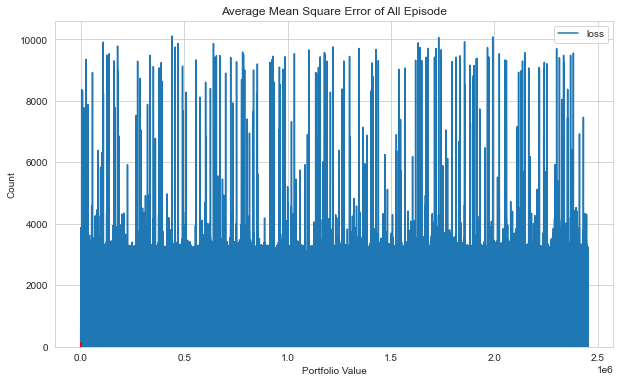

In [22]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

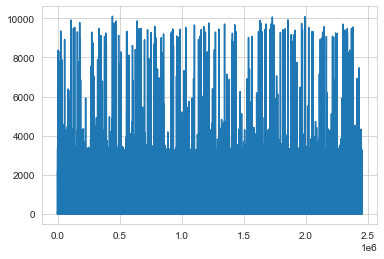

In [23]:
plt.plot(agent.model.losses)

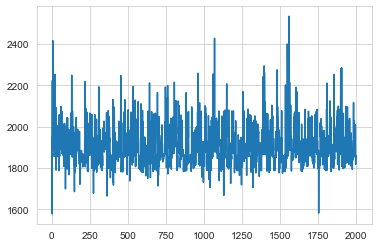

In [24]:
plt.plot(portfolio_value)

episode end value: 1447.66, duration: 0:00:00.051011
Sell: 4 times, Buy: 9 times


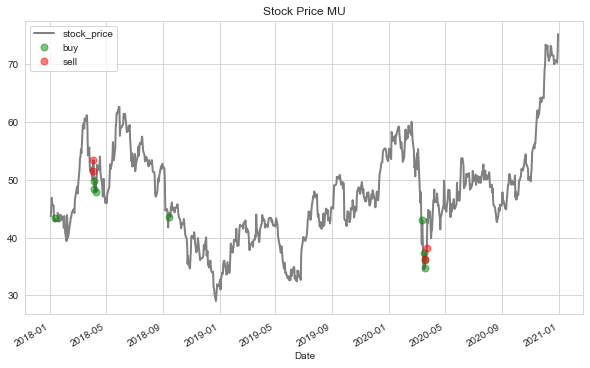

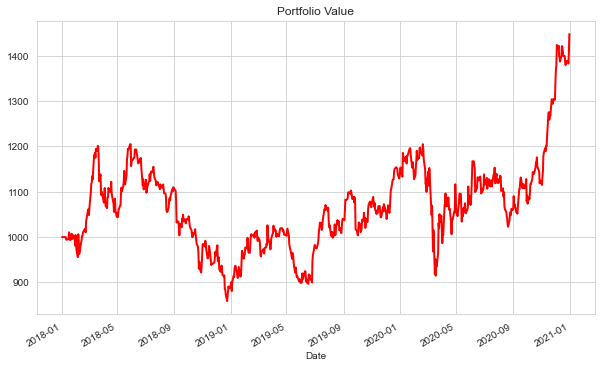

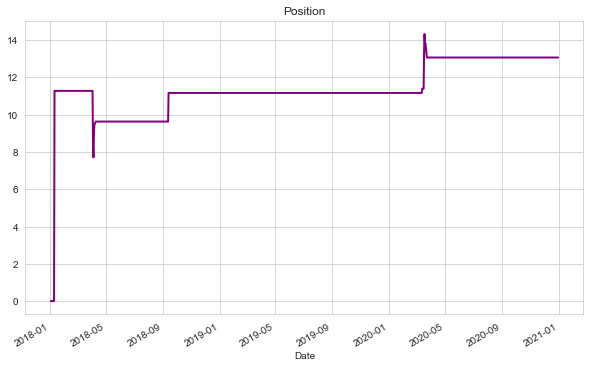

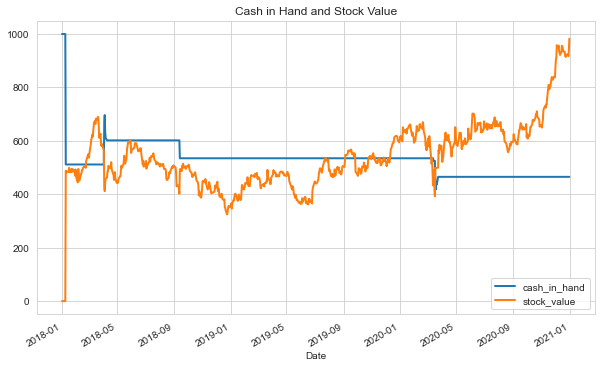

In [25]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [26]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: MU
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 13.12 %
Volatility: 0.2504
shape ratio: 0.4801
Maximun drawdown: -28.72 %
Calmar ratio: 0.4570
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 19.85 %
Volatility (benchmark): 0.5049
shape ratio: 0.3714
Maximun drawdown: -53.66 %
Calmar ratio (benchmark): 0.3700


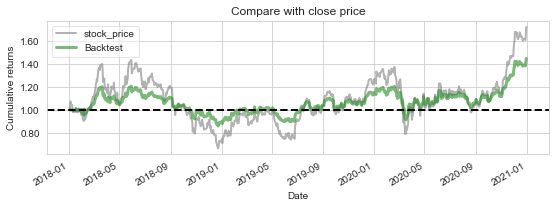

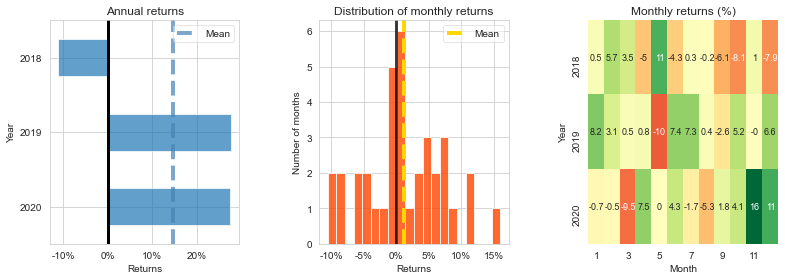

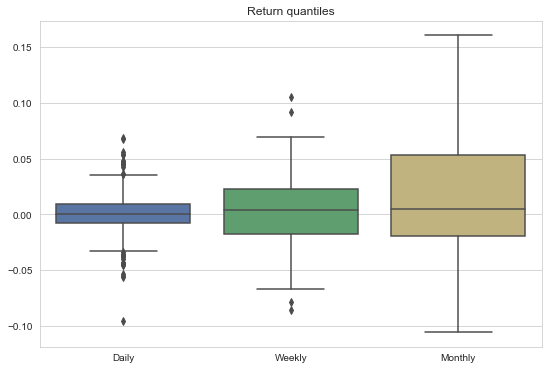

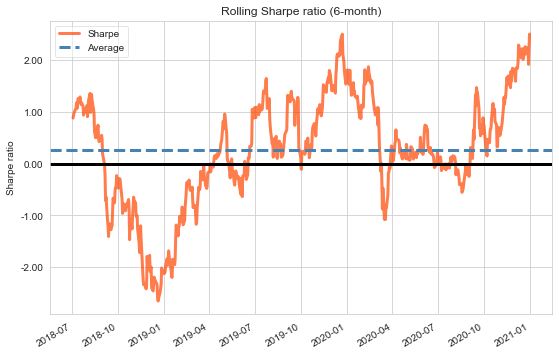

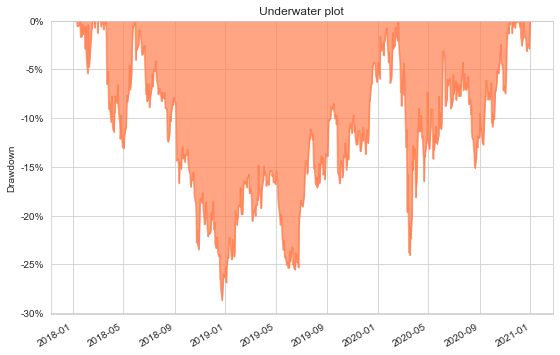

In [27]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')